# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Chakra Jumpajeen

## What does a Simple Linear Regression Model do?

#### Lisnear Regression is a powerful tool for prediction, but understanding correlation and residuals is critical for effective model building.

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
data = sns.load_dataset('diamonds') 

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* 1.0 and -1.0 is Perfect positive 
* .90 to .99 and -.90 to -.99 is Very strong positive 
* .70 to .89 and -.70 to -.89 is Strong positive
* .50 to .69 and -.50 to -.69 is Moderate positive
* .30 to .49 and -.30 to -.49 is Weak positive
* .01 to .30 and -.01 to -.30 is Negligible positive
* 0.00 is No correlation

In [64]:
# 8. In a code cell, use the Pandas corr() method with the diamonds dataset and display the first seven rows.

pandas_data = pd.DataFrame(data)

pandas_data = pandas_data.select_dtypes(include=['float64', 'int64'])
pandas_data.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

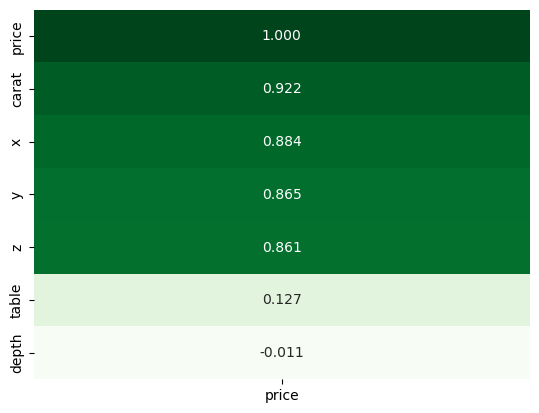

In [79]:
# 9. Use a condensed heatmap to identify correlations for the price column. Sort the results, 
#    include annotations that format the values with three decimal places, and remove the color bar.

sns.heatmap(
            data=pandas_data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, 
            cmap='Greens', 
            cbar=False, 
            fmt=f'.3f'
        )

## Procedure for Creating and Using a Regression Model
1. The dataset is split into a *training dataset* that’s used to train the model and a *test dataset* that’s used to validate the model. These training and test datasets can be created with specific criteria or by randomly selecting values and assigning them to either the training or test dataset.
2. The training dataset is used to create the regression model.
3. The test dataset is run against the model to see how accurate the results of the model are. If the values that are generated by the model are close to the actual values, the model is considered to be valid.
4. If the model is valid, you can use it to predict the dependent variable based on the independent variables. That of course is the purpose of a regression model.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [93]:
# 12. Use the column with the strongest correlation to split the data into test and training datasets, 
#    where the test dataset consists of 30% of the total dataset. Specify a value of 20 for the random_state parameter.

x_train, x_test, y_train, y_test = train_test_split(pandas_data[['carat']], pandas_data[['price']], test_size=0.3, random_state=20)


In [95]:
# 13. Create a LinearRegression object named model and print it.

model = LinearRegression()
print(model)

LinearRegression()


In [97]:
# 14. Fit the training dataset to the model.
model.fit(x_train, y_train)

LinearRegression()

In [99]:
# 15. Score the model using the test dataset.
model.score(x_test, y_test) 

0.8504107786474793

In [101]:
# 16. Use the model to predict the y values based on the x values in the test dataset. Assign the results in a variable and display the variable.

y_predicted = model.predict(x_test) 
y_predicted


array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871521],
       [-464.18539337],
       [5507.68827094]])

In [107]:
# 17. Put the predicted values in a new DataFrame with its single column named predicted_price. Then display the first three throws. 

predicted_price_data = pd.DataFrame(y_predicted, columns=['predicted_price'])


predicted_price_data.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [109]:
# 18. Join the y_test and predicted data with the x_test data and save the joined data in a new DataFrame. 
#    Then display the first five rows of the new DataFrame.

combined_data = predicted_price_data.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined_data.head(5)

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [115]:
# 19. Melt the price and predicted_price columns together, assigning values to the var_name and value_name as shown. Display the melted DataFrame.

melted = pd.melt(
    combined_data, id_vars=['carat'], 
    value_vars=['price','predicted_price'], 
    var_name='price_type', value_name='price_value')

melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


<Axes: xlabel='carat', ylabel='price_value'>

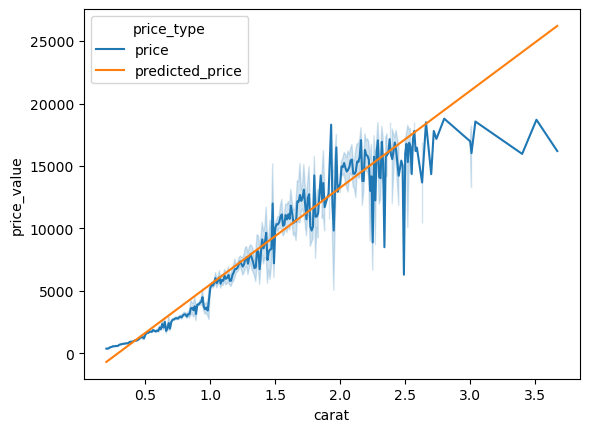

In [121]:
# 20. Use a Seaborn line plot without a confidence interval to plot the predicted data.

sns.lineplot(data=melted, x='carat', y='price_value', hue='price_type')


## Regression line equation is y = mx + b, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [174]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [176]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [178]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.36058004672


In [180]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.36058004672


In [240]:
m_value = m.item() if hasattr(m, 'item') else m
b_value = b.item() if hasattr(b, 'item') else b

eqaution = float((m_value * 0.7) + b_value)

print(f"The predicted price for a 0.70 carat diamond is ${eqaution:.2f}")

The predicted price for a 0.70 carat diamond is $3173.14


In [242]:
eqaution = float((m_value * 0.54) + b_value)

print(f"The predicted price for a 0.54 carat diamond is ${eqaution:.2f}")

The predicted price for a 0.54 carat diamond is $1932.11


## Yes, the estimates in the previous two cells close to the predicted prices in the results of step 18.